In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Defining column names (based on the UCI adult.names file)
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

In [5]:
# Loading the dataset
df = pd.read_csv("/content/adult_data.csv",
                 header=None,
                 names=column_names,
                 na_values="?",
                 skipinitialspace=True)

In [6]:
# Show the first few rows (optional in Colab)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Summary statistics for numerical columns
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,17189.000000,1.718900e+04,17189.000000,17189.000000,17189.000000,17189.000000
mean,38.540695,1.902087e+05,10.093781,1046.197219,86.897725,40.423352
std,13.636170,1.053463e+05,2.557357,7223.277927,400.430697,12.273113
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.187790e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.788290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378240e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age                 0
workclass         966
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        969
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    312
income              1
dtype: int64


In [9]:
# Dropping rows with missing values
df = df.dropna()

In [11]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15922 entries, 0 to 17187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15922 non-null  int64 
 1   workclass       15922 non-null  object
 2   fnlwgt          15922 non-null  int64 
 3   education       15922 non-null  object
 4   education-num   15922 non-null  int64 
 5   marital-status  15922 non-null  object
 6   occupation      15922 non-null  object
 7   relationship    15922 non-null  object
 8   race            15922 non-null  object
 9   sex             15922 non-null  object
 10  capital-gain    15922 non-null  int64 
 11  capital-loss    15922 non-null  int64 
 12  hours-per-week  15922 non-null  int64 
 13  native-country  15922 non-null  object
 14  income          15922 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [12]:
# Viewing unique education levels
print("Unique education levels:")
print(df["education"].unique())

Unique education levels:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']


In [14]:
# Counting each education level
print("Education level counts:")
print(df["education"].value_counts())

Education level counts:
education
HS-grad         5254
Some-college    3506
Bachelors       2705
Masters          873
Assoc-voc        677
11th             552
Assoc-acdm       515
10th             431
7th-8th          291
Prof-school      273
9th              241
Doctorate        195
12th             172
5th-6th          144
1st-4th           74
Preschool         19
Name: count, dtype: int64


In [15]:
# Grouping income counts by education level
income_education = df.groupby(['education', 'income']).size().unstack()
print(income_education)

income         <=50K    >50K
education                   
10th           397.0    34.0
11th           523.0    29.0
12th           160.0    12.0
1st-4th         71.0     3.0
5th-6th        138.0     6.0
7th-8th        269.0    22.0
9th            229.0    12.0
Assoc-acdm     380.0   135.0
Assoc-voc      513.0   164.0
Bachelors     1579.0  1126.0
Doctorate       48.0   147.0
HS-grad       4379.0   875.0
Masters        381.0   492.0
Preschool       19.0     NaN
Prof-school     75.0   198.0
Some-college  2830.0   676.0


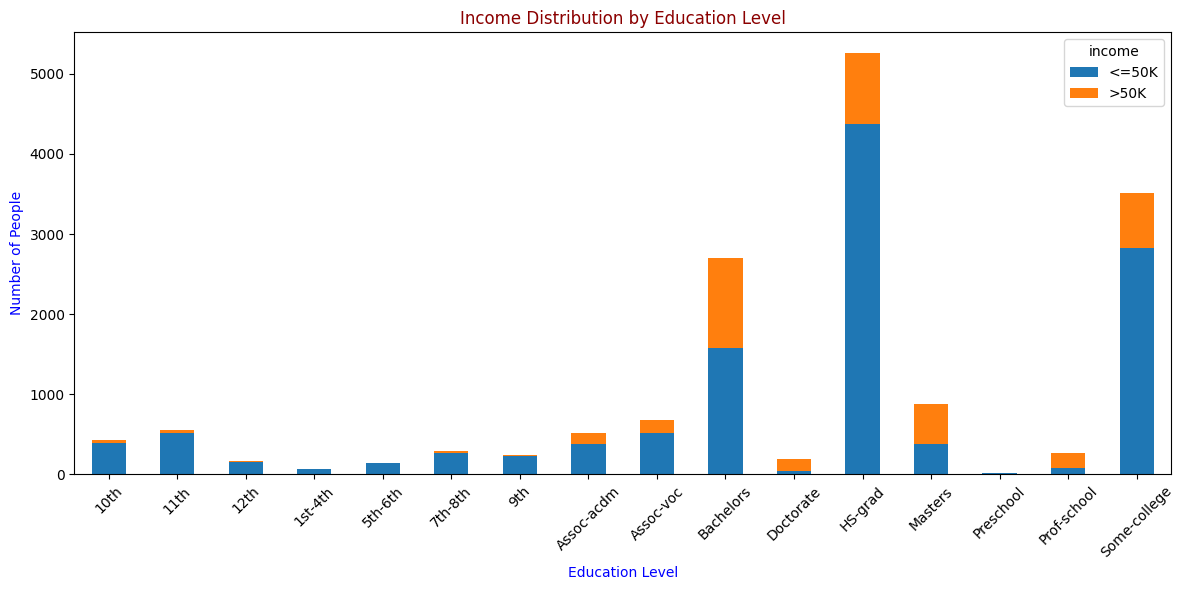

In [16]:
# Stacked bar plot of income by education level
income_education.plot(kind="bar", figsize=(12, 6), stacked=True)
plt.title("Income Distribution by Education Level", color="darkred")
plt.xlabel("Education Level", color='blue')
plt.ylabel("Number of People", color='blue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# 📊 Calculating and sorting percentage of people earning >50K for each education level
income_education['>50K_percent'] = income_education['>50K'] / income_education.sum(axis=1) * 100
print("\nPercentage of people earning >50K by education level (sorted):")
print(income_education['>50K_percent'].sort_values(ascending=False))


Percentage of people earning >50K by education level (sorted):
education
Doctorate       75.384615
Prof-school     72.527473
Masters         56.357388
Bachelors       41.626617
Assoc-acdm      26.213592
Assoc-voc       24.224520
Some-college    19.281232
HS-grad         16.653978
10th             7.888631
7th-8th          7.560137
12th             6.976744
11th             5.253623
9th              4.979253
5th-6th          4.166667
1st-4th          4.054054
Preschool             NaN
Name: >50K_percent, dtype: float64


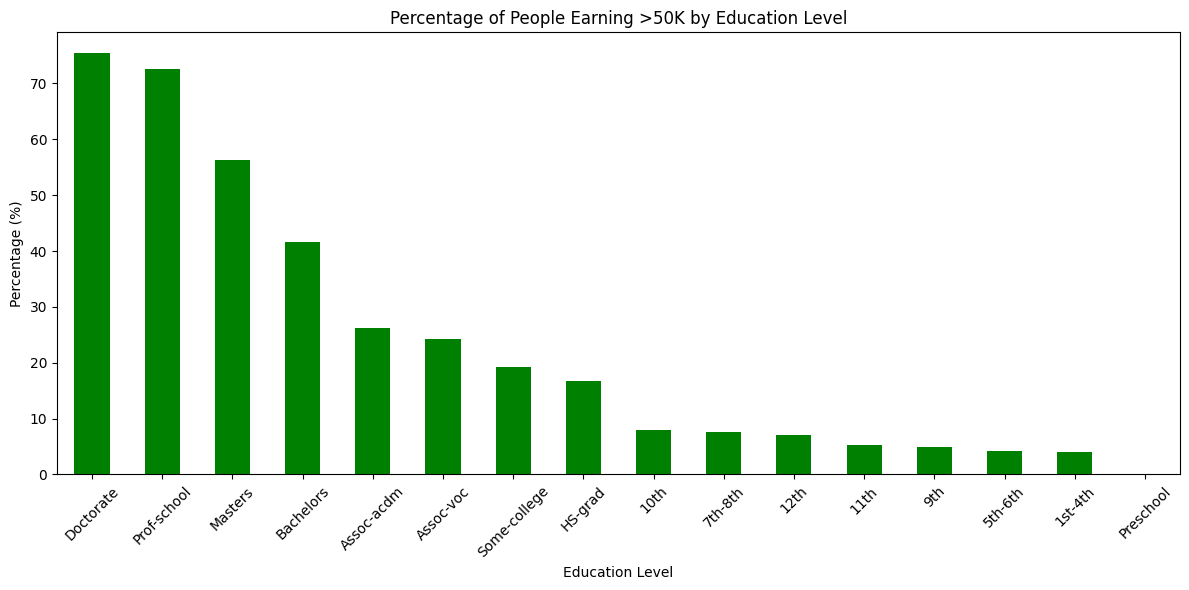

In [18]:
# Bar plot of >50K percentages
income_education['>50K_percent'].sort_values(ascending=False).plot(kind="bar", figsize=(12, 6), color="green")
plt.title("Percentage of People Earning >50K by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Preparing data for modeling
data = df[['education-num', 'age', 'hours-per-week', 'income']]
data

,education-num,age,hours-per-week,income
0,13,39,40,<=50K
1,13,50,13,<=50K
2,9,38,40,<=50K
3,7,53,40,<=50K
4,13,28,40,<=50K
...,...,...,...,...
17183,9,51,40,<=50K
17184,13,23,10,<=50K
17185,11,22,44,<=50K
17186,10,37,40,>50K


In [21]:
# Converting income from text to binary (<=50K → 0, >50K → 1)
le = LabelEncoder()
data['income'] = le.fit_transform(data['income'])

/tmp/ipython-input-21-458549362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income'] = le.fit_transform(data['income'])


In [22]:
# Splitting features and target
X = data.drop('income', axis=1)  # Features
y = data['income']               # Target

In [23]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [25]:
# Training a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

🔍 Accuracy: 0.7770800627943485

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      2394
           1       0.60      0.30      0.40       791

    accuracy                           0.78      3185
   macro avg       0.70      0.62      0.63      3185
weighted avg       0.75      0.78      0.75      3185

